In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

In [2]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [3]:
def tokenize_text(text):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    return tokens

In [4]:
def get_attention_scores(text):
    tokens = tokenize_text(text)
    with torch.no_grad():
        outputs = model(**tokens)
    attentions = outputs.attentions
    return attentions, tokens["input_ids"]

In [5]:
def visualize_attention(text):
    attentions, input_ids = get_attention_scores(text)
    attention_scores = attentions[-1].squeeze(0).mean(0).cpu().numpy()
    tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze(0).tolist())

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_scores, annot=True, fmt=".2f", xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", cbar=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.xlabel("Tokens")
    plt.ylabel("Tokens")
    plt.title("Attention Correlation Heatmap")
    plt.show()


In [6]:
user_text = input("Enter a medical note: ")

Enter a medical note: Frequent episodes of nausea and fatigue, with no significant changes in appetite or weight


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


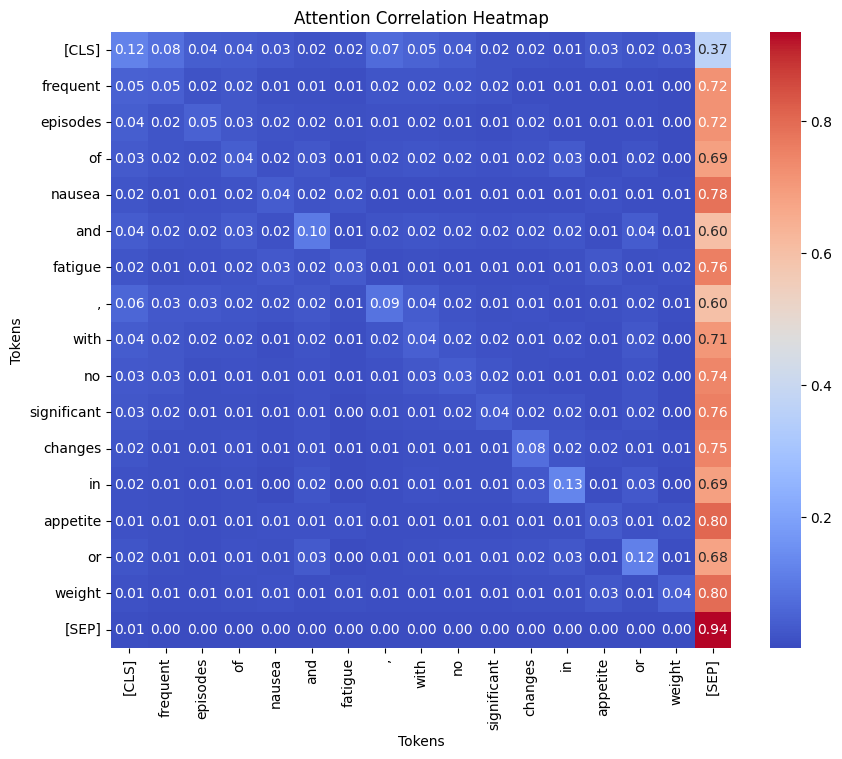

In [7]:
visualize_attention(user_text)